# Linpack

Let's see what influence other workloads have on Linpack.

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

from helpers.load_data import (
    clean_column_names,
    get_data_with_cpu,
    get_experiments_paths,
    trim_experiment,
)
from helpers.regression import (
    draw_regression_graph,
    fit_regression,
)

experiments_path = '../../data'

## Linpack 12x20min

In [32]:
experiment_name = 'linpack_1_linpack_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606609932,NaN,74.4316,0.013435,2519.5,1.556021e+10,1.0
1,1606610019,NaN,75.0075,0.013332,2502.0,1.556304e+10,1.0
2,1606610105,NaN,75.8662,0.013181,2450.0,1.546324e+10,1.0
3,1606610189,NaN,77.2404,0.012947,2332.0,1.545943e+10,1.0
4,1606610273,NaN,77.2766,0.012941,2359.5,1.545954e+10,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     645.5
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           2.05e-51
Time:                        13:34:39   Log-Likelihood:                -426.76
No. Observations:                 128   AIC:                             857.5
Df Residuals:                     126   BIC:                             863.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      88.3029      1.191     74.124      

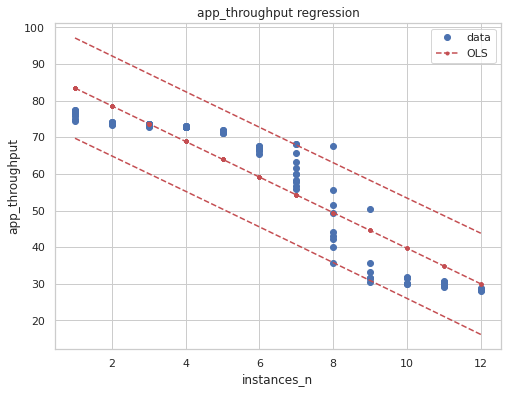

In [33]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     384.4
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           4.31e-40
Time:                        13:34:48   Log-Likelihood:                 536.35
No. Observations:                 128   AIC:                            -1069.
Df Residuals:                     126   BIC:                            -1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0072      0.001     11.139      

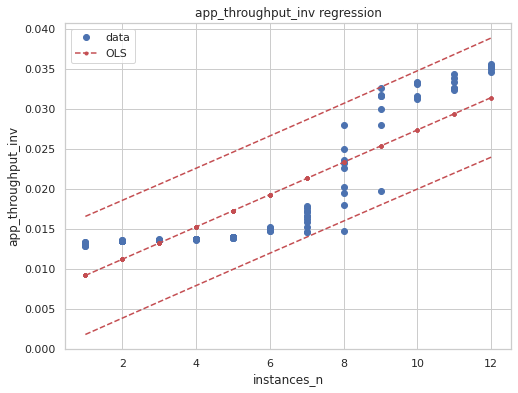

In [34]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

## Linpack 1x20min, Redis YCBS 11x20min

In [23]:
experiment_name = 'linpack_1_redis_ycsb_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
df = trim_experiment(df, 12)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606691637,NaN,76.7933,0.013022,2379.5,1.549185e+10,1.0
1,1606691722,NaN,77.0210,0.012983,2372.0,1.547125e+10,1.0
2,1606691807,NaN,76.9275,0.012999,2371.0,1.543284e+10,1.0
3,1606691892,NaN,76.3750,0.013093,2373.5,1.538955e+10,1.0
4,1606691977,NaN,76.9672,0.012993,2378.0,1.538958e+10,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2661.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          9.51e-106
Time:                        13:32:25   Log-Likelihood:                -335.88
No. Observations:                 172   AIC:                             675.8
Df Residuals:                     170   BIC:                             682.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      80.2549      0.271    296.690      

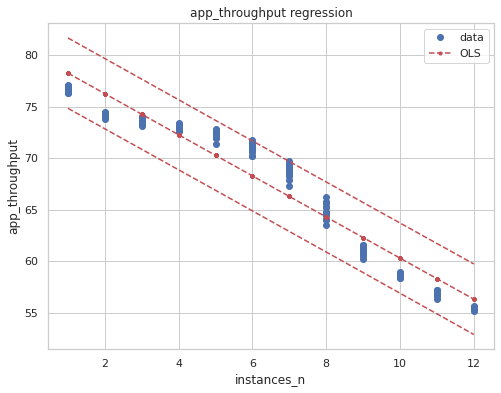

In [24]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1791.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):           3.47e-92
Time:                        13:32:29   Log-Likelihood:                 1070.6
No. Observations:                 172   AIC:                            -2137.
Df Residuals:                     170   BIC:                            -2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0120    7.6e-05    158.532      

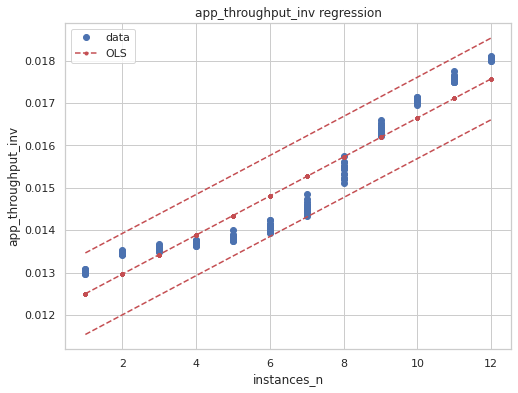

In [25]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

## Linpack 1x20min, Hadoop 9x20min

In [26]:
experiment_name = 'linpack_1_hadoop_9'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=10, cpu_window=30)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606755392,NaN,77.1026,0.012970,2354.5,1.510043e+10,1.0
1,1606755475,NaN,77.5047,0.012902,2351.5,1.510103e+10,1.0
2,1606755559,NaN,77.1751,0.012958,2354.5,1.506054e+10,1.0
3,1606755643,NaN,77.2992,0.012937,2348.5,1.502236e+10,1.0
4,1606755727,NaN,77.4050,0.012919,2344.0,1.502183e+10,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.069e+04
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.31e-173
Time:                        13:32:50   Log-Likelihood:                -319.20
No. Observations:                 199   AIC:                             642.4
Df Residuals:                     197   BIC:                             649.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      80.7249      0.180    447.305      

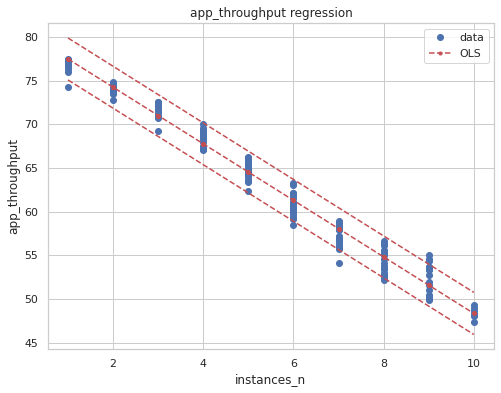

In [27]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     4866.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          7.62e-141
Time:                        13:32:56   Log-Likelihood:                 1249.4
No. Observations:                 199   AIC:                            -2495.
Df Residuals:                     197   BIC:                            -2488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0117   6.81e-05    171.652      

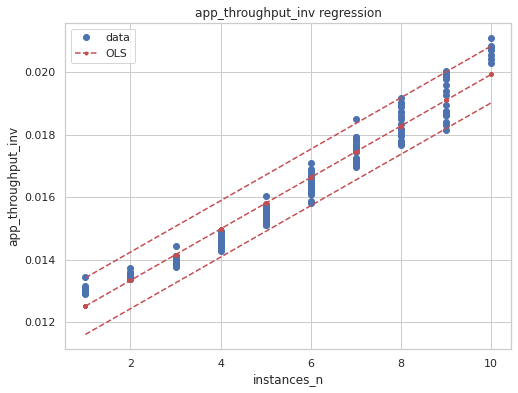

In [28]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())

## Linpack 1x20min, sysbench 11x20min

In [29]:
experiment_name = 'linpack_1_sysbench_11'
path = next(get_experiments_paths(experiment_name, experiments_path))
df = get_data_with_cpu(path, instances_n=12, cpu_window=30)
# df = trim_experiment(df, 8)
df['app_throughput_inv'] = 1. / df['app_throughput']
df.head()

,cbtool_time,app_latency,app_throughput,app_throughput_inv,cpu,memory,instances_n
0,1606777240,NaN,76.9221,0.013000,2371.5,1.642516e+10,1.0
1,1606777325,NaN,76.8574,0.013011,2391.5,1.641228e+10,1.0
2,1606777410,NaN,76.8480,0.013013,2379.5,1.641335e+10,1.0
3,1606777495,NaN,76.6220,0.013051,2387.0,1.524723e+10,1.0
4,1606777580,NaN,76.8409,0.013014,2382.0,1.524325e+10,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     2927.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          1.00e-123
Time:                        13:33:31   Log-Likelihood:                -16.301
No. Observations:                 208   AIC:                             36.60
Df Residuals:                     206   BIC:                             43.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      76.6370      0.039   1951.519      

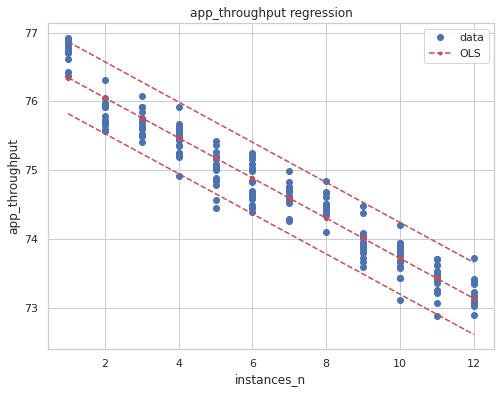

In [30]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `1 / app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:     app_throughput_inv   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     3028.
Date:                Fri, 04 Dec 2020   Prob (F-statistic):          3.88e-125
Time:                        13:33:38   Log-Likelihood:                 1782.3
No. Observations:                 208   AIC:                            -3561.
Df Residuals:                     206   BIC:                            -3554.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0130    6.9e-06   1890.822      

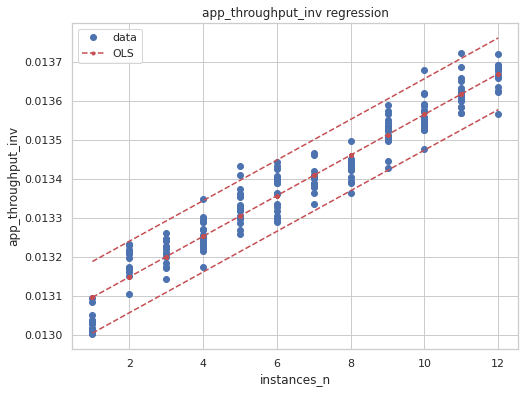

In [31]:
results = fit_regression(data=df, formula='app_throughput_inv ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput_inv', variable='instances_n')
print(results.summary())